In [74]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab

import matplotlib.pylab as pylab

import os
cwd = os.getcwd()

Set file to look at containing data

#Import excel file into pandas dataframe

In [75]:
#mainpath = 'C:/Users/mb22/OneDrive/PhD/Quasar Shared/'
#filepath = 'Data/NPL_Table_All.xlsx'
filepath = 'Data to Import/NPL_Table_All-Anon.xlsx'

#fullpath=mainpath+filepath
fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
print(fullpath) #note forward and backward slashes in output

all_data = pd.read_excel(filepath, parse_dates=['Date'])
all_data.head()

C:\Users\mb22\OneDrive\PhD\Quasar Shared\Modelling\IPython/Data to Import/NPL_Table_All-Anon.xlsx


,Centre_ID,Group,CentreType,Date,Type,Energy,CoP,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments
0,1,1,NHS,2007-02-09,MV,6,NaN,0.993,0.15,1.005,0.1,0.992,0.4,Measured result (1.003 from tabulated data)
1,1,1,NHS,2007-02-09,MV,15,NaN,0.995,0.15,1.008,0.1,0.991,0.4,NaN
2,1,1,NHS,2007-02-10,MeV,4,2003,0.010,0.20,0.998,0.2,1.001,0.4,NaN
3,1,1,NHS,2007-02-10,MeV,6,2003,0.020,0.20,1.003,0.2,1.002,0.4,NaN
4,1,1,NHS,2007-02-10,MeV,9,2003,0.030,0.20,1.003,0.2,1.001,0.4,NaN


#Filter to only contain NHS data

In [76]:
df3 = all_data.copy()
nhs_data = df3[df3['CentreType'].isin(['NHS'])]

nhs_data.tail()

,Centre_ID,Group,CentreType,Date,Type,Energy,CoP,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments
270,19,7,NHS,2003-01-13,MeV,4,1996,NaN,NaN,1.010000,0.5,NaN,NaN,Data from paper report
271,19,7,NHS,2003-01-13,MeV,6,1996,NaN,NaN,1.009000,0.5,NaN,NaN,Data from paper report
272,19,7,NHS,2003-01-13,MeV,10,1996,NaN,NaN,1.004000,0.5,NaN,NaN,Data from paper report
273,19,7,NHS,2003-01-13,MeV,18,1996,NaN,NaN,1.007000,0.5,NaN,NaN,Data from paper report
274,40,4,NHS,1998-06-11,kV,30,NaN,NaN,NaN,1.011928,0.6,NaN,NaN,NaN


#Calculate some stats & check data types

In [77]:
#Number of unique dates = number of visits

nhs_data.groupby(['Type'])['Date'].nunique().reset_index() # number of unique dates = number of visits


,Type,Date
0,MV,47
1,MeV,23
2,kV,12


#Create seperate dataframes for MV, MeV and kV for NHS

In [78]:
#beam_types = all_data.groupby('Type')
#beam_types.mean()

df2 = nhs_data.copy()
mv_data = df2[df2['Type'].isin(['MV'])]
mev_data = df2[df2['Type'].isin(['MeV'])]
kv_data = df2[df2['Type'].isin(['kV'])]

#df3 = ed.copy()
#mev_data_notg5 = df3[~df3['Centre'].str.contains('CPUK')]
#mev_data_notg5

md = mv_data
ed = mev_data
kd = kv_data
#mv_data.describe()
md.describe()
#kv_data.describe()

,Centre_ID,Group,Energy,CoP,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError
count,81.000000,81.000000,81.000000,0,81.000000,81.000000,81.000000,81.000000,80.000000,8.000000e+01
mean,18.641975,3.888889,8.629630,NaN,0.998920,0.187037,1.000463,0.177778,0.999049,4.000000e-01
std,14.223492,2.765863,3.783003,NaN,0.005326,0.022048,0.006755,0.041079,0.007169,1.161521e-08
min,1.000000,1.000000,4.000000,NaN,0.985000,0.150000,0.987000,0.100000,0.958000,4.000000e-01
25%,4.000000,1.000000,6.000000,NaN,0.995000,0.150000,0.995000,0.200000,0.997000,4.000000e-01
50%,17.000000,3.000000,6.000000,NaN,0.998700,0.200000,1.000000,0.200000,1.000000,4.000000e-01
75%,28.000000,6.000000,10.000000,NaN,1.002000,0.200000,1.005000,0.200000,1.002250,4.000000e-01
max,46.000000,9.000000,25.000000,NaN,1.012000,0.200000,1.019900,0.200000,1.010900,4.000000e-01


#Make some quick graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AF39490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x02E761D0>]], dtype=object)

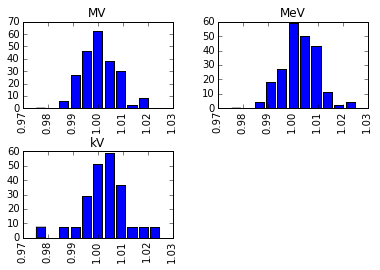

In [79]:
from decimal import * # decimal means that more exact maths can be done with a specified precision.
getcontext().prec = 28
range_lower = Decimal('0.975')
range_upper = Decimal('1.025')
bin_width = Decimal('0.005')
number_bins = (range_upper-range_lower)/bin_width + 1

nhs_data['OPRatio'].hist(by=nhs_data['Type'], normed=True, bins=11, range=(0.975,1.025), rwidth=0.8) #simple auto plot in a grid

#Histograms

##Ideally make into a function and feed data frame, title, filename

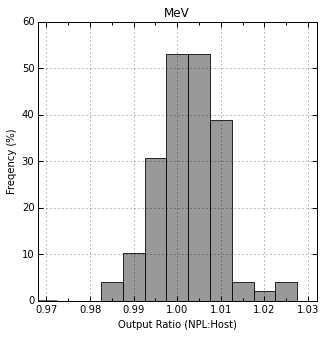

In [80]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('MeV')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Freqency (%)")
plt.xlim(0.968, 1.032)
plt.ylim(0, 60)

mev_data['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=True,
                               facecolor = 'grey', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = mev_data['OPRatio'].mean()
sd = mev_data['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
#plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('NPL_Paper_Plots/NPL_kV_Hist_NHS.png', bbox_inches='tight', dpi=300)

#Get some more stats such as Mean, SD, Skew etc.

In [81]:
print('Skew')
print('All: ', nhs_data['OPRatio'].skew())
print('MV: ', mv_data['OPRatio'].skew())
print('MeV: ', mev_data['OPRatio'].skew())
print('kV: ', kv_data['OPRatio'].skew())
print()
print('SEM')
print('MV: ', mv_data['OPRatio'].sem())
print('MeV: ', mev_data['OPRatio'].sem())
print('kV: ', kv_data['OPRatio'].sem())
print()
print('Mean')
print('MV: ', mv_data['OPRatio'].mean())
print('MeV: ', mev_data['OPRatio'].mean())
print('kV: ', kv_data['OPRatio'].mean())
print()
print('SD')
print('MV: ', mv_data['OPRatio'].std())
print('MeV: ', mev_data['OPRatio'].std())
print('kV: ', kv_data['OPRatio'].std())
print()
from scipy import stats
print('Skew Test')
print('MV: ', stats.skewtest(mv_data['OPRatio']))
print('MeV: ', stats.skewtest(mev_data['OPRatio']))
print('kV: ', stats.skewtest(kv_data['OPRatio']))
#print(stats.skewtest(plotdata['OPRatio']))

Skew
All:  0.307590932966
MV:  0.592176242776
MeV:  0.466380037151
kV:  -0.542474179878

SEM
MV:  0.000750579488625
MeV:  0.000743812749039
kV:  0.00161102602937

Mean
MV:  1.00046273021
MeV:  1.00274897959
kV:  1.00243094765

SD
MV:  0.00675521539763
MeV:  0.0073633705429
kV:  0.00882395297016

Skew Test
MV:  (2.1713497799271417, 0.029904742036325212)
MeV:  (1.9017396983087147, 0.057205193207671701)
kV:  (-1.3049192895103978, 0.19192033215468751)


#Plot of All Audits

In [82]:
# Calculate rolling SD of 20 values

mv_data_datesort = md.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
mev_data_datesort = ed.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
kv_data_datesort = kd.sort(['Date', 'Energy'], ascending=True) #Sort by date and energy and put into new dataframe
#mv_data_datesort.append('SD_Prev20')

m = mv_data_datesort     # to allow shorter references to dataframes
e = mev_data_datesort
k = kv_data_datesort

m['SD_Prev20'] = np.nan
m['SD_Prev20'] = pd.rolling_std(m['OPRatio'],window=20)

e['SD_Prev20'] = np.nan
e['SD_Prev20'] = pd.rolling_std(e['OPRatio'],window=20)

k['SD_Prev20'] = np.nan
k['SD_Prev20'] = pd.rolling_std(k['OPRatio'],window=20)

k.head()


,Centre_ID,Group,CentreType,Date,Type,Energy,CoP,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,Comments,SD_Prev20
274,40,4,NHS,1998-06-11,kV,30,NaN,NaN,NaN,1.011928,0.6,NaN,NaN,NaN,NaN
57,6,6,NHS,2005-08-09,kV,85,NaN,1.07,3,0.999000,0.6,NaN,NaN,NaN,NaN
58,6,6,NHS,2005-08-09,kV,250,NaN,1.02,5,1.008000,0.8,1.001,0.4,NaN,NaN
103,21,7,NHS,2005-08-25,kV,60,NaN,NaN,NaN,1.002000,0.6,NaN,NaN,NaN,NaN
104,21,7,NHS,2005-08-25,kV,80,NaN,NaN,NaN,0.976000,0.6,NaN,NaN,NaN,NaN


##Histogram

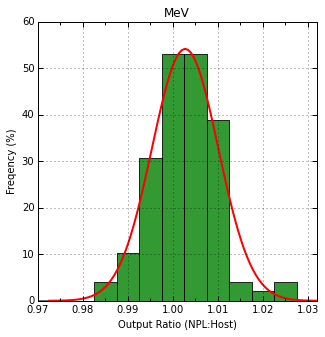

In [83]:
pylab.rcParams['figure.figsize'] = 5, 5 # change size of figures

from matplotlib.ticker import AutoMinorLocator

d = e  #m = mv_data_datesort

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
plt.title('MeV')
plt.xlabel("Output Ratio (NPL:Host)")
plt.ylabel("Freqency (%)")
plt.xlim(0.97, 1.032)
plt.ylim(0, 60)

d['OPRatio'].hist(bins=14, range=(0.9675, 1.0375), normed=True,
                               facecolor = 'green', alpha = 0.8, ax=axes, rwidth=1)

axes.xaxis.set_minor_locator(AutoMinorLocator(2)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

mean = d['OPRatio'].mean()
sd = d['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
plt.plot(x, mlab.normpdf(x,mean,sd), linewidth = 2, color='red')

#plt.savefig('NPL_Paper_Plots/NPL_MeV_NotG5_Hist_Fit.png', bbox_inches='tight', dpi=300)

##All audits in order

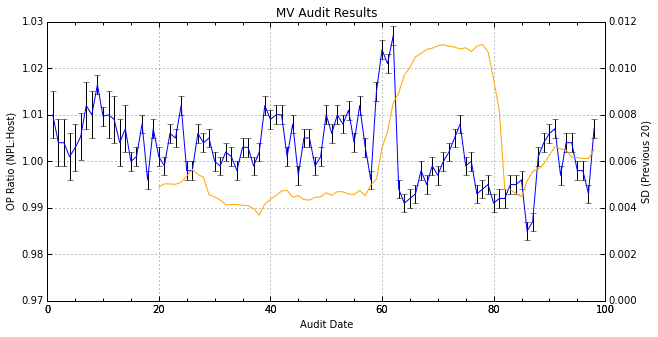

In [85]:
#m = mv_data_datesort

#frames = [m, e, k]
#d=pd.concat(frames) # to join all data together

d = e

pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
fig1 = plt.figure()
axes1 = fig1.add_subplot(1,1,1)
plt.title('MV Audit Results')
plt.xlabel("Audit Date")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97, 1.03)
axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

x=np.arange(1,d['OPRatio'].count()+1)
#x=d['Date']
y=d['OPRatio']
yerr=(d['OPError']*d['OPRatio'])/100

ysd=d['SD_Prev20']

plt.errorbar(x, y, yerr=yerr, ecolor='black')
axes2=fig1.add_subplot(111, sharex=axes1, frameon=False)
axes2.yaxis.tick_right()
axes2.yaxis.set_label_position('right')
plt.ylim(0, 0.012)
plt.ylabel("SD (Previous 20)")
line2=axes2.plot(x,ysd, color='orange')

#plt.savefig('NPL_Paper_Plots/NPL_kV_All_SD_NHS.png', bbox_inches='tight', dpi=300)

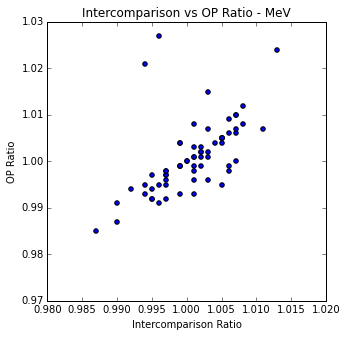

In [17]:
d=e

plt.figure(figsize=(5,5))
x=d['IntercompRatio']
#x=d['BeamQualRatio']
y=d['OPRatio']
plt.scatter(x,y)
plt.xlim(0.98,1.02)
plt.ylim(0.97,1.03)

plt.title('Intercomparison vs OP Ratio - MeV')
plt.xlabel("Intercomparison Ratio")
plt.ylabel("OP Ratio")

#plt.savefig('NPL_Paper_Plots/NPL_MeV_IntercompvsOP.png', bbox_inches='tight', dpi=300)

##Add linear fit to graphs

In [18]:
print(d['OPRatio'].head(5))

94     1.0100
95     1.0040
69     1.0040
70     1.0010
199    1.0029
Name: OPRatio, dtype: float64


y = 0.877669444351x + 0.122761479032
Residuals:  [ 0.00266662]


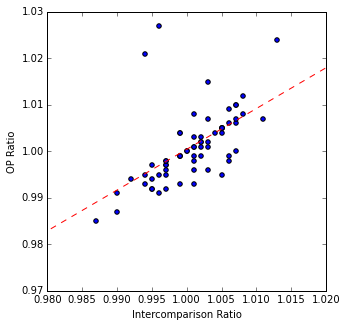

In [19]:
d=e       ## Use np.polyfit() to fit straight lines. weightings can be used with 1/sigma. 

x=d['IntercompRatio'].values
y=d['OPRatio'].values

#print(x,y)

idx = np.isfinite(x) #This checks for NaN values as can't fit NaN values in IntercompRatio
#fit_results = np.polyfit(x[idx], y[idx], 1, cov=True) #use full=True to give residuals, use cov=True to give covariance matrix
#print(fit_results)
(grad, intercept), residuals,  rank, singular_values, rcond  = np.polyfit(x[idx], y[idx], 1, full=True)

print('y = ' + str(grad) + 'x + ' + str(intercept))
print('Residuals: ', residuals)
ext=0.03
xfit=np.linspace(min(x[idx])-ext,max(x[idx])+ext,20)
yfit= (grad*xfit) + intercept

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(xfit,yfit, color='red', ls='--')
plt.xlim(0.98,1.02)
plt.ylim(0.97,1.03)
plt.xlabel('Intercomparison Ratio')
plt.ylabel('OP Ratio')

savename = 'Curve_Fits/IntCompvsOP_kV_linfit.png'
#plt.savefig(savename, bbox_inches='tight', dpi=300)

Variance Estimates:  [ 0.023919    0.02395391]
grad =  0.853750446799  -  0.901588441902
intercept =  0.0988075654565  -  0.146715392608


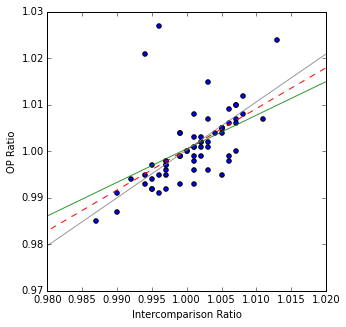

In [20]:
fit_stuff  = np.polyfit(x[idx], y[idx], 1, cov=True)
var_est = np.diagonal(fit_stuff[1]) # variance estimates are the diagonals in the covariance matrix?

print('Variance Estimates: ', var_est)
print('grad = ', grad-var_est[0], ' - ', grad+var_est[0])
print('intercept = ', intercept-var_est[1], ' - ', intercept+var_est[1])

#yfit1= (grad-var_est[0])*xfit + (intercept+var_est[1])
#yfit2= (grad-var_est[0])*xfit + (intercept-var_est[1])
#yfit3= (grad+var_est[0])*xfit + (intercept+var_est[1])
#yfit4= (grad+var_est[0])*xfit + (intercept-var_est[1])

yfit1= (grad-var_est[0]**0.5)*xfit + (intercept+var_est[1]**0.5)
yfit2= (grad-var_est[0]**0.5)*xfit + (intercept-var_est[1]**0.5)
yfit3= (grad+var_est[0]**0.5)*xfit + (intercept+var_est[1]**0.5)
yfit4= (grad+var_est[0]**0.5)*xfit + (intercept-var_est[1]**0.5)

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(xfit,yfit, color='red', ls='--')
plt.xlim(0.98,1.02)
plt.ylim(0.97,1.03)
plt.xlabel('Intercomparison Ratio')
plt.ylabel('OP Ratio')
plt.plot(xfit,yfit1, color='green', alpha=0.8)
plt.plot(xfit,yfit2, color='orange', alpha=0.8)
plt.plot(xfit,yfit3, color='blue', alpha=0.8)
plt.plot(xfit,yfit4, color='grey', alpha=0.8)

savename = 'Curve_Fits/IntCompvsOP_kV_linfit_errors.png'
plt.savefig(savename, bbox_inches='tight', dpi=300)

##Fit confidence interval based on Standard Error

Summary: a=0.1228+/-0.3043, b=0.8777+/-0.3041
Confidence intervals: ci_a=(-0.1815 - 0.4271), ci_b=(0.5736 - 1.1818)
Residuals: variance = 0.0000, standard deviation = 0.0064
alpha = 0.050, tval = 1.9971, df=65
Example: x = 1.0+/-0.012888763643259518 => se_fit = 0.0008, se_predict = 0.00645


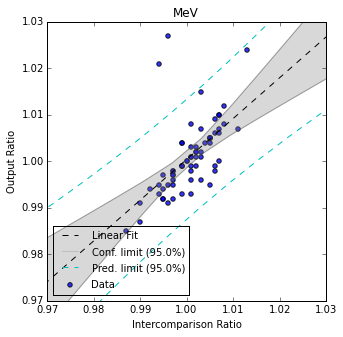

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def fitLine(x, y, alpha=0.05, newx=[], plotFlag=1):
    ''' Fit a curve to the data using a least squares 1st order polynomial fit '''
    
    # Summary data
    n = len(x)   # number of samples     
    
    Sxx = np.sum(x**2) - np.sum(x)**2/n
#    Syy = np.sum(y**2) - np.sum(y)**2/n    # not needed here
    Sxy = np.sum(x*y) - np.sum(x)*np.sum(y)/n    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Linefit
    b = Sxy/Sxx
    a = mean_y - b*mean_x
    
    # Residuals
    fit = lambda xx: a + b*xx    
    residuals = y - fit(x)
    
    var_res = np.sum(residuals**2)/(n-2)
    sd_res = np.sqrt(var_res)
    
    # Confidence intervals
    se_b = sd_res/np.sqrt(Sxx)
    se_a = sd_res*np.sqrt(np.sum(x**2)/(n*Sxx))
    
    df = n-2                            # degrees of freedom
    tval = stats.t.isf(alpha/2., df)    # appropriate t value
    
    ci_a = a + tval*se_a*np.array([-1,1])
    ci_b = b + tval*se_b*np.array([-1,1])

    # create series of new test x-values to predict for
    npts = 100
    #px = np.linspace(np.min(x),np.max(x),num=npts)
    
    ext=0.3
    xfit=np.linspace(min(x)-ext,max(x)+ext,100)
    
    se_fit     = lambda x: sd_res * np.sqrt(  1./n + (x-mean_x)**2/Sxx)
    se_predict = lambda x: sd_res * np.sqrt(1+1./n + (x-mean_x)**2/Sxx)
    
    print ('Summary: a={0:5.4f}+/-{1:5.4f}, b={2:5.4f}+/-{3:5.4f}'.format(a,tval*se_a,b,tval*se_b))
    print ('Confidence intervals: ci_a=({0:5.4f} - {1:5.4f}), ci_b=({2:5.4f} - {3:5.4f})'.format(ci_a[0], ci_a[1], ci_b[0], ci_b[1]))
    print ('Residuals: variance = {0:5.4f}, standard deviation = {1:5.4f}'.format(var_res, sd_res))
    print ('alpha = {0:.3f}, tval = {1:5.4f}, df={2:d}'.format(alpha, tval, df))
    
    # Return info
    ri = {'residuals': residuals, 
        'var_res': var_res,
        'sd_res': sd_res,
        'alpha': alpha,
        'tval': tval,
        'df': df}
    
    if plotFlag == 1:
        # Plot the data
        plt.figure(figsize=(5,5))
        
        plt.plot(xfit, fit(xfit),color='black', ls='--', label='Linear Fit')
       # plt.plot(x,y,'b.', label='Sample observations')
        plt.scatter(x,y, alpha=0.8, label='Data')
        
        x.sort()
        limit = (1-alpha)*100
        
        if conf_int == True:
            plt.plot(xfit, fit(xfit)+tval*se_fit(xfit), 'grey', alpha=0.3, label='Conf. limit ({0:.1f}%)'.format(limit))
            plt.plot(xfit, fit(xfit)-tval*se_fit(xfit), 'grey', alpha=0.3)
        
            plt.fill_between(xfit, fit(xfit)+tval*se_fit(xfit), fit(xfit)-tval*se_fit(xfit), facecolor='grey', alpha=0.3)
        
            plt.plot(xfit, fit(xfit)+tval*se_predict(xfit), 'c--', label='Pred. limit ({0:.1f}%)'.format(limit))
            plt.plot(xfit, fit(xfit)-tval*se_predict(xfit), 'c--')

        
        if min(x)<0:
            plt.xlabel('Beam Quality Ratio')
        else:
            plt.xlabel('Intercomparison Ratio')
        
        plt.ylabel('Output Ratio')
        if typestr=='MeV' and min(x)<0:
            plt.xlim(-0.4,0.4)
        else:
            plt.xlim(0.97,1.03)
        
        plt.ylim(0.97,1.03)
        plt.title(typestr)
        
        # configure legend
        plt.legend(loc='lower left', scatterpoints = 1)
        leg = plt.gca().get_legend()
        ltext = leg.get_texts()
        plt.setp(ltext, fontsize=10)

        # show the plot
        #plt.show()
        
    if newx != []:
        try:
            newx.size
        except AttributeError:
            newx = np.array([newx])
    
        print ('Example: x = {0}+/-{1} => se_fit = {2:5.4f}, se_predict = {3:6.5f}'\
        .format(newx[0], tval*se_predict(newx[0]), se_fit(newx[0]), se_predict(newx[0])))
        
        newy = (fit(newx), fit(newx)-se_predict(newx), fit(newx)+se_predict(newx))
        return (a,b,(ci_a, ci_b), ri, newy)
    else:
        return (a,b,(ci_a, ci_b), ri)
    
#if __name__ == '__main__':
        # example data
        #x = np.array([15.3, 10.8, 8.1, 19.5, 7.2, 5.3, 9.3, 11.1, 7.5, 12.2,
        #              6.7, 5.2, 19.0, 15.1, 6.7, 8.6, 4.2, 10.3, 12.5, 16.1, 
        #              13.3, 4.9, 8.8, 9.5])
        #y = np.array([1.76, 1.34, 1.27, 1.47, 1.27, 1.49, 1.31, 1.09, 1.18, 
        #              1.22, 1.25, 1.19, 1.95, 1.28, 1.52, np.nan, 1.12, 1.37, 
        #              1.19, 1.05, 1.32, 1.03, 1.12, 1.70])
                      
#        goodIndex = np.invert(np.logical_or(np.isnan(x), np.isnan(y)))
        
## Function used to fit line

d=e       ## Use np.polyfit() to fit straight lines. weightings can be used with 1/sigma. 

xraw=d['IntercompRatio'].values
#xraw=d['BeamQualRatio'].values
yraw=d['OPRatio'].values
typestr=d['Type'].values[0] #for title of plot
#print(typestr[0])

idx = np.isfinite(xraw) #This checks for NaN values as can't fit NaN values in IntercompRatio
x=xraw[idx]
y=yraw[idx]

conf_int = True #specify whether to plot confidence intervals

(a,b,(ci_a, ci_b), ri,newy) = fitLine(x,y, alpha=0.05,newx=np.array([1,4.5]))

#savename = 'Curve_Fits/BeamQualvsOP_MV_linfit.png'
#plt.savefig(savename, bbox_inches='tight', dpi=300)

In [28]:
(grad, intercept), residuals,  rank, singular_values, rcond  = np.polyfit(x[idx], y[idx], 1, full=True)
#var_est = np.diagonal(fit_stuff[1]) # variance estimates are the diagonals in the covariance matrix?

yfit1= (grad-var_est[0]**0.5)*xfit + (intercept+var_est[1]**0.5)
yfit2= (grad-var_est[0]**0.5)*xfit + (intercept-var_est[1]**0.5)

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(xfit,yfit, color='red', ls='--')
plt.xlim(0.98,1.02)
plt.ylim(0.97,1.03)
plt.xlabel('Intercomparison Ratio')
plt.ylabel('OP Ratio')
plt.plot(xfit,yfit1, color='green', alpha=0.8)
plt.plot(xfit,yfit2, color='orange', alpha=0.8)
plt.plot(xfit,yfit3, color='blue', alpha=0.8)
plt.plot(xfit,yfit4, color='grey', alpha=0.8)

#savename = 'Curve_Fits/IntCompvsOP_kV_linfit_errors.png'
#plt.savefig(savename, bbox_inches='tight', dpi=300)

IndexError: index 67 is out of bounds for axis 1 with size 67

In [23]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x[idx],y[idx])
print('y = ', slope, 'x + ', intercept)
print('R squared: ', r_value**2)
print('Std Error: ', std_err)
print('P Value: ', p_value)

IndexError: index 61 is out of bounds for axis 1 with size 61

In [21]:
##fitting function taken from http://stackoverflow.com/questions/19379295/linear-regression-with-pandas-dataframe

#from scipy.stats import linregress
#def fit_line1(x, y):
#    """Return slope, intercept of best fit line."""
#    # Remove entries where either x or y is NaN.
#    clean_data = pd.concat([x, y], 1).dropna(0) # row-wise
#    (_, x), (_, y) = clean_data.iteritems()
#    slope, intercept, r, p, stderr = linregress(x, y)
#    return slope, intercept # could also return stderr

#m, b = fit_line1(x, y)
#N = 100 # could be just 2 if you are only drawing a straight line...
#points = np.linspace(x.min(), x.max(), N)
#plt.plot(points, m*points + b)
#plt.scatter(x,y)

Want to do the below with it split into groups, and also split into 5 year periods to see the variation with time. (Similar to Palmer paper...)

Plot all groups OP data as a sort of scatter plot (rather than use box plot?)

##Some statistical analysis such as T-tests
Can see there is no statistical difference between the low and high groupings.

In [29]:
import scipy
ehighlow = scipy.stats.ttest_ind(ehigh['OPRatio'], elow['OPRatio'], equal_var=False)
print("Low vs high MeV: ", "T-Stat: ", ehighlow[0], " p-val: ", ehighlow[1])
mhighlow = scipy.stats.ttest_ind(mhigh['OPRatio'], mlow['OPRatio'], equal_var=False)
print("Low vs high MV: ", "T-Stat: ", mhighlow[0], " p-val: ", mhighlow[1])
khighlow = scipy.stats.ttest_ind(khigh['OPRatio'], klow['OPRatio'], equal_var=False)
print("Low vs high kV: ", "T-Stat: ", khighlow[0], " p-val: ", khighlow[1])

em = scipy.stats.mannwhitneyu(e['OPRatio'], m['OPRatio']) # mannwitneyu test used to compare without assumtion of gaussian errors...
print("MeV vs MV: ", "T-Stat: ", em[0], " p-val: ", em[1])


NameError: name 'ehigh' is not defined

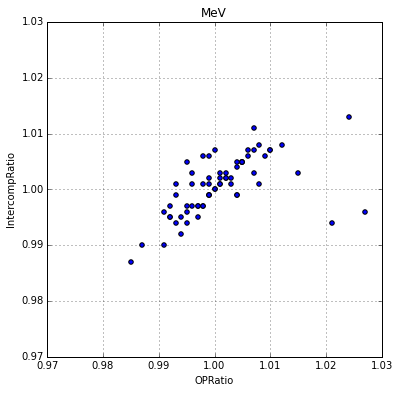

In [30]:
## OP ratio vs IntercompRatio has a trend.
## i.e. intercomparison is good, but the absolute calibration is off?
comp = e

compare = comp.plot(kind='scatter', x='OPRatio',y='IntercompRatio', figsize=(6,6), ylim=(0.97,1.03), xlim=(0.97,1.03), title="MeV")
fig = compare.get_figure()
#fig.savefig('NPL_Paper_Plots/NPL_MeV_OPvsIntercomp_NHS.png', bbox_inches='tight', dpi=300)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AAFF1B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0AA2C270>]], dtype=object)

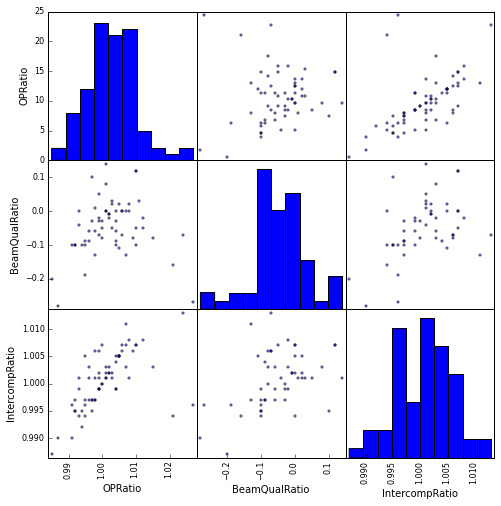

In [31]:
from pandas.tools import plotting
plotting.scatter_matrix(e[['OPRatio', 'BeamQualRatio', 'IntercompRatio']], figsize=(8,8))

##Histogram of different energies

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A91B9D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0B3494D0>]], dtype=object)

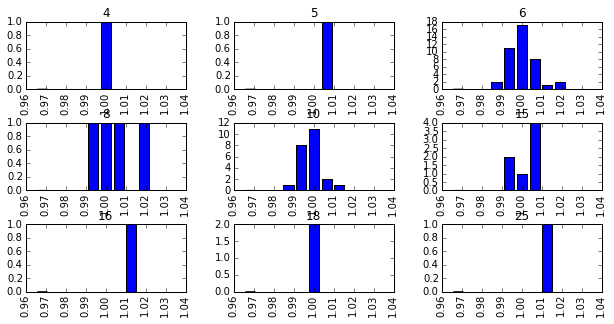

In [33]:
d = e
plt.figure()
m['OPRatio'].hist(by=m['Energy'],normed=False, bins=11, range=(0.965,1.035), rwidth=0.8)


##Histogram of different regions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B6FFB50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0B8ABB50>]], dtype=object)

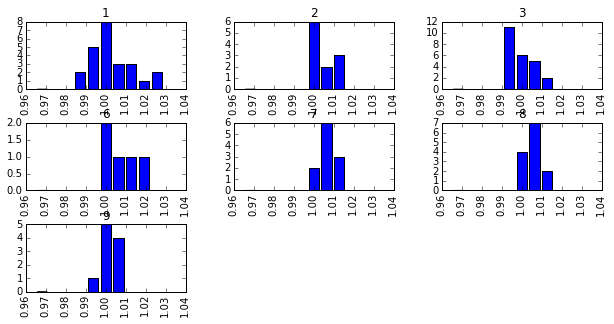

In [35]:
d=e
plt.figure()
d['OPRatio'].hist(by=d['Group'],normed=False, bins=11, range=(0.965,1.035), rwidth=0.8)

##Histogram for different CoPs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0CDABD50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0D19C090>], dtype=object)

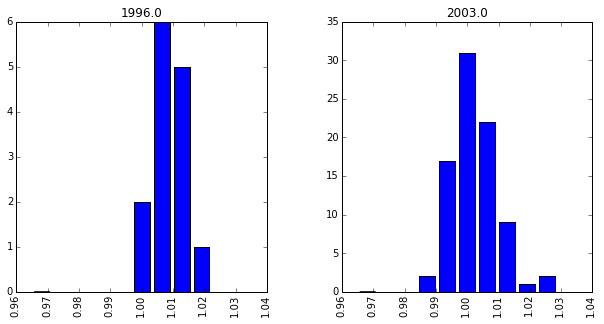

In [40]:
d=e
plt.figure()
d['OPRatio'].hist(by=d['CoP'],normed=False, bins=11, range=(0.965,1.035), rwidth=0.8)
#d['OPRatio'].hist(by=d['CoP'])

## test if the mean is 1.0 for OPRatios using 1 sided t-test

In [27]:
import scipy
scipy.stats.ttest_1samp(m['OPRatio'], 1)

(0.61649727045474012, 0.53931678628824342)

MV


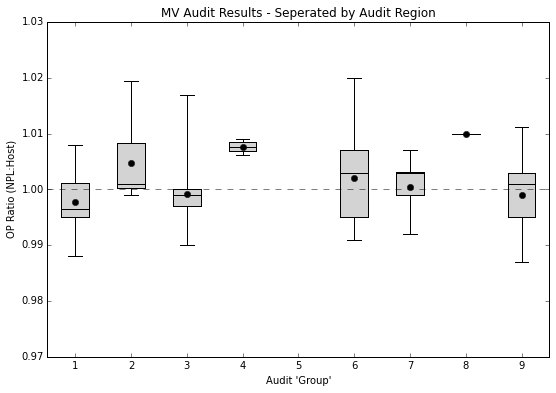

In [40]:
# extract only Groups and OPRatio to allow simple box plot production 
#mv = mv_data_datesort[['Group', 'OPRatio']]

# make a numpy array to use rather than pandas?
#g = np.array(mv_data_datesort['Group'])
#op = np.array(mv_data_datesort['OPRatio'])

#m = mv_data_datesort

d = m

#mv_data_datesort

g1 = d.loc[d['Group']==1, ['OPRatio']]
g2 = d.loc[d['Group']==2, ['OPRatio']]
g3 = d.loc[d['Group']==3, ['OPRatio']]
g4 = d.loc[d['Group']==4, ['OPRatio']]
g5 = d.loc[d['Group']==5, ['OPRatio']]
g6 = d.loc[d['Group']==6, ['OPRatio']]
g7 = d.loc[d['Group']==7, ['OPRatio']]
g8 = d.loc[d['Group']==8, ['OPRatio']]
g9 = d.loc[d['Group']==9, ['OPRatio']]

grouped=[g1,g2,g3,g4,g5,g6,g7,g8,g9] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)

bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)
plt.plot([-1,10],[1,1], linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1

typestr=d['Type'].values[0]
print(typestr)

if typestr == 'MV':
    plt.title('MV Audit Results - Seperated by Audit Region')
if typestr == 'MeV':
    plt.title('MeV Audit Results - Seperated by Audit Region')
if typestr == 'kV':
    plt.title('kV Audit Results - Seperated by Audit Region')

plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97,1.03)

for box in bp['boxes']:
    box.set(facecolor='lightgrey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_kV_All_Groups_NHS.png', bbox_inches='tight', dpi=300)

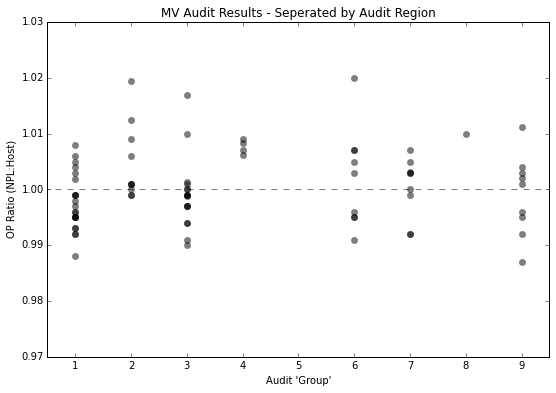

In [41]:
fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
ax.set_xticks([1,2,3,4,5,6,7,8,9])

one = plt.plot([0,10],[1,1], '--', color='black', alpha=0.5) #add line for OPratio=1

for i in range(0, len(grouped)):
    scat = plt.plot(np.linspace(i+1,i+1,len(grouped[i])), grouped[i], u'o', color='black', alpha=0.5, linewidth=2)

plt.xlim(0.5,9.5)
plt.ylim(0.97,1.03)
if typestr == 'MV':
    plt.title('MV Audit Results - Seperated by Audit Region')
if typestr == 'MeV':
    plt.title('MeV Audit Results - Seperated by Audit Region')
if typestr == 'kV':
    plt.title('kV Audit Results - Seperated by Audit Region')
plt.xlabel("Audit 'Group'")
plt.ylabel("OP Ratio (NPL:Host)")

##### can add box plot over the top by uncommenting the below line

#bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True)

for box in bp['boxes']:
    box.set(facecolor='grey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_kV_All_Groups_Scat_NHS.png', bbox_inches='tight', dpi=300)

##Split MeV data by energy

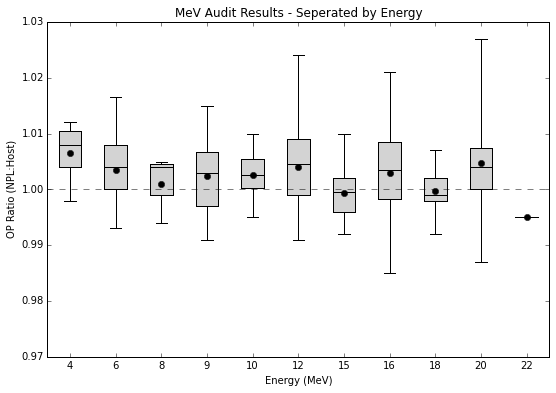

In [44]:
d = e

e1 = d.loc[d['Energy']==4, ['OPRatio']]
e2 = d.loc[d['Energy']==6, ['OPRatio']]
e3 = d.loc[d['Energy']==8, ['OPRatio']]
e4 = d.loc[d['Energy']==9, ['OPRatio']]
e5 = d.loc[d['Energy']==10, ['OPRatio']]
e6 = d.loc[d['Energy']==12, ['OPRatio']]
e7 = d.loc[d['Energy']==15, ['OPRatio']]
e8 = d.loc[d['Energy']==16, ['OPRatio']]
e9 = d.loc[d['Energy']==18, ['OPRatio']]
e10 = d.loc[d['Energy']==20, ['OPRatio']]
e11 = d.loc[d['Energy']==22, ['OPRatio']]

grouped=[e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11] # this should be able to be done a bit easier without splitting it all up first.

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
#labels = list('ABCDEFGHIJK')
labels = ['4','6','8','9','10','12','15','16','18','20','22']


bp = ax.boxplot(grouped, whis='range', patch_artist=True, showmeans=True, labels=labels)
plt.plot([-1,20],[1,1], linestyle='--', color='black', alpha=0.5) #add line at OPRatio=1
plt.title('MeV Audit Results - Seperated by Energy')
plt.xlabel("Energy (MeV)")
plt.ylabel("OP Ratio (NPL:Host)")
plt.ylim(0.97,1.03)

#ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11], ['4','6','8','9','10','12','15','16','18','20','22'])

for box in bp['boxes']:
    box.set(facecolor='lightgrey')
    
for whisker in bp['whiskers']:
    whisker.set(linestyle='-', color='black') 
    
for median in bp['medians']:
    median.set(color='black')
    
for mean in bp['means']:
    mean.set(marker='o', color='black', markerfacecolor='black')
    
#plt.savefig('NPL_Paper_Plots/NPL_kV_All_Groups_NHS.png', bbox_inches='tight', dpi=300)

##Is there any different between electron CoPs?
1996 vs 2003

In [59]:
e1996 = e.loc[e['CoP']==1996]
e2003 = e.loc[e['CoP']==2003]

e1996.describe()


,Centre_ID,Group,Energy,CoP,BeamQualRatio,BeamQualError,OPRatio,OPError,IntercompRatio,IntercompError,SD_Prev20
count,14.000000,14.000000,14.000000,14,0,0,14.000000,14.000000,0,0,0
mean,22.142857,6.571429,9.000000,1996,NaN,NaN,1.007529,0.457143,NaN,NaN,NaN
std,11.966988,2.138090,3.721042,0,NaN,NaN,0.004227,0.108941,NaN,NaN,NaN
min,9.000000,2.000000,4.000000,1996,NaN,NaN,1.001000,0.200000,NaN,NaN,NaN
25%,13.500000,6.250000,6.000000,1996,NaN,NaN,1.004000,0.500000,NaN,NaN,NaN
50%,19.000000,7.000000,9.000000,1996,NaN,NaN,1.008000,0.500000,NaN,NaN,NaN
75%,30.250000,7.750000,11.500000,1996,NaN,NaN,1.010000,0.500000,NaN,NaN,NaN
max,44.000000,9.000000,18.000000,1996,NaN,NaN,1.016500,0.500000,NaN,NaN,NaN


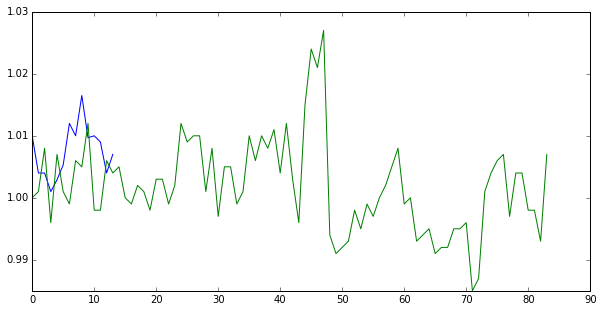

In [89]:
plt.plot(e1996['OPRatio'])

plt.plot(e2003['OPRatio'])

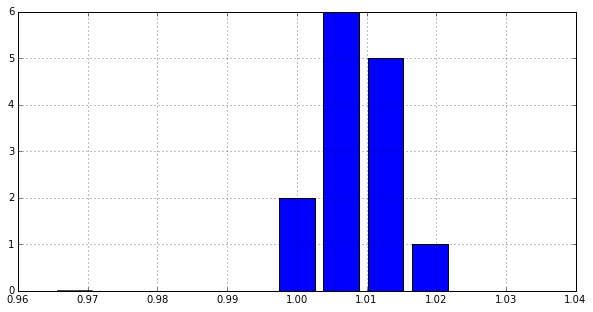

In [120]:
d = e1996
#d = e2003

d['OPRatio'].hist(normed=False, bins=11, range=(0.965,1.035), rwidth=0.8)

In [106]:
print('1996 SD: ' + str(e1996['OPRatio'].std()))
print('2003 SD: ' + str(e2003['OPRatio'].std()))

1996 SD: 0.00422746124417
2003 SD: 0.00748799000147


In [107]:
e1996['OPRatio'].describe()

count    14.000000
mean      1.007529
std       0.004227
min       1.001000
25%       1.004000
50%       1.008000
75%       1.010000
max       1.016500
Name: OPRatio, dtype: float64

##t test to see if 1996 and 2003 are different

In [112]:
from scipy.stats import ttest_ind
ttest_ind(e1996['OPRatio'], e2003['OPRatio'])


(2.7075779667767108, 0.0080241603895986249)

This indicates that there **is** a difference between the two CoPs

##Welch's t-test also shows they are different
###This does not assume equal variance and sample size which is what we have

In [118]:
ttest_ind(e1996['OPRatio'], e2003['OPRatio'], equal_var=False)
#(t stat, p-val)

(3.9993191093586256, 0.00040250171278835822)

###Wilcoxon test shows the same.

In [117]:
from scipy.stats import ranksums
ranksums(e1996['OPRatio'], e2003['OPRatio'])

(3.1269438398822862, 0.0017663366484100124)

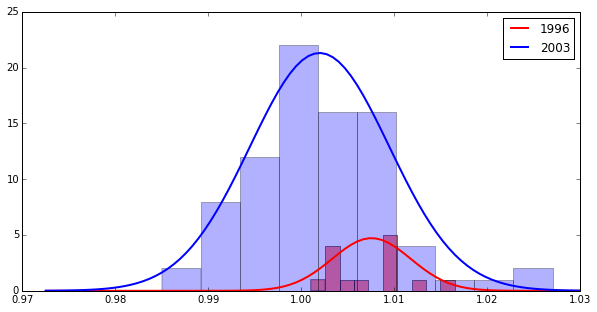

In [153]:
##plot of both 1996 and 2003 on same axes
##also do a gaussian plot of each from SD etc?

mean1996 = e1996['OPRatio'].mean()
sd1996 = e1996['OPRatio'].std()
mean2003 = e2003['OPRatio'].mean()
sd2003 = e2003['OPRatio'].std()

x = np.linspace(0.9725, 1.0375, 100) # add normal distibution fit
plt.plot(x, 0.05*mlab.normpdf(x,mean1996,sd1996), linewidth = 2, color='red', label = '1996')
plt.plot(x, 0.4*mlab.normpdf(x,mean2003,sd2003), linewidth = 2, color='blue', label = '2003')
plt.xlim(0.97, 1.03)
plt.legend(loc='best')
plt.hist(e1996['OPRatio'].values, color='red', alpha=0.5)
plt.hist(e2003['OPRatio'].values, color='blue', alpha=0.3)
plt.show()


(0.97, 1.03)

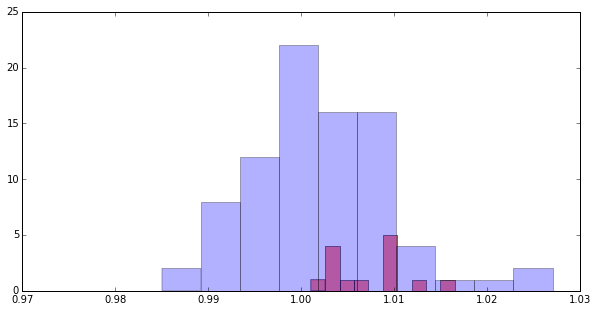

In [166]:
plt.hist(e1996['OPRatio'].values, normed=False, alpha = 0.5, color = 'red')
plt.hist(e2003['OPRatio'].values, normed=False, alpha = 0.3, color = 'blue')
plt.xlim(0.97, 1.03)